In [4]:
import cv2
import numpy as np
import scipy.stats as stats
import skimage
import imageio
import mpmath
import matplotlib.pyplot as plt
import seaborn as sns
import PIL
from scipy.stats import multivariate_normal
from skimage import data, img_as_float
from skimage import exposure
from skimage.filters import threshold_mean
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
import sklearn.metrics

## 3 Reading and Displaying Images

In [5]:
image1 = cv2.imread('image-35.jpg')
image2 = cv2.imread('image-83.jpg')
image3 = cv2.imread('image-110.jpg')

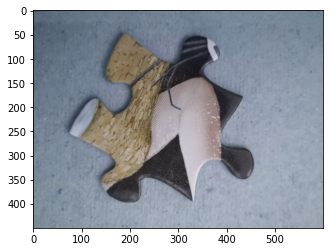

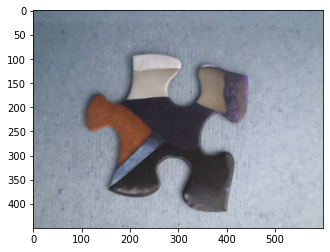

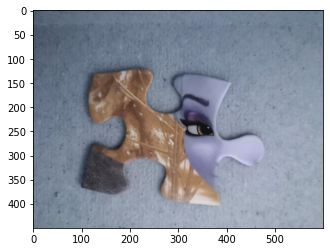

In [6]:
plt.imshow(image1)
plt.show()
plt.imshow(image2)
plt.show()
plt.imshow(image3)
plt.show()


### 3) The images do not look correct, because OpenCV uses BGR not RGB.

In [7]:
# Fixing BGR to RGB
image1 = image1[:,:,::-1]
image2 = image2[:,:,::-1]
image3 = image3[:,:,::-1]


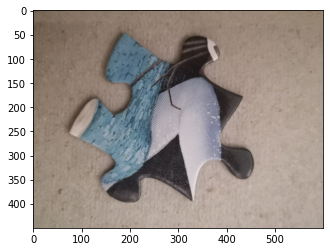

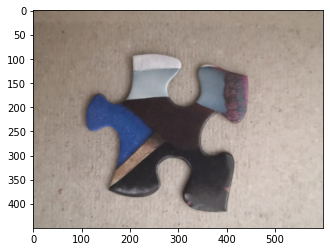

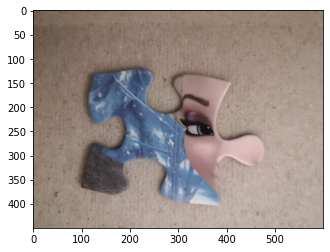

In [8]:
plt.imshow(image1)
plt.show()
plt.imshow(image2)
plt.show()
plt.imshow(image3)
plt.show()


Colours are all fixed.

In [9]:
# Converting to greyscale
image1_grey = skimage.color.rgb2gray(image1)
image2_grey = skimage.color.rgb2gray(image2)
image3_grey = skimage.color.rgb2gray(image3)


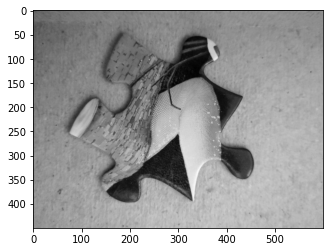

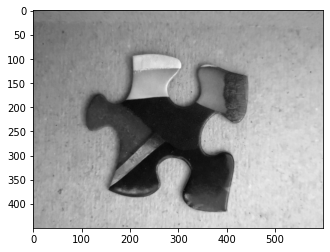

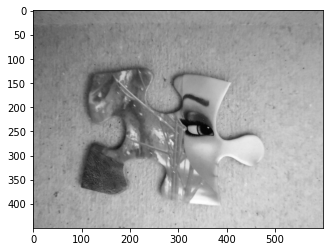

In [10]:
plt.imshow(image1_grey, cmap = 'gray')
plt.show()
plt.imshow(image2_grey, cmap = 'gray')
plt.show()
plt.imshow(image3_grey, cmap = 'gray')
plt.show()


In [11]:
# Converting to HSV

image1_HSV = skimage.color.rgb2hsv(image1)
image2_HSV = skimage.color.rgb2hsv(image2)
image3_HSV = skimage.color.rgb2hsv(image3)


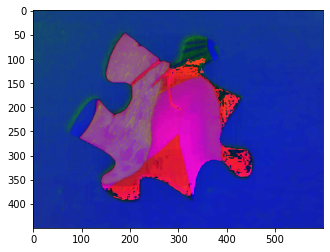

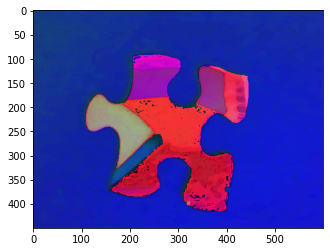

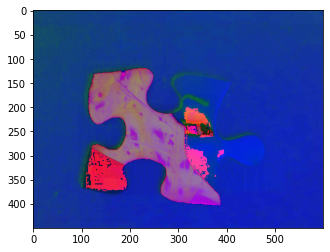

In [12]:
plt.imshow(image1_HSV)
plt.show()
plt.imshow(image2_HSV)
plt.show()
plt.imshow(image3_HSV)
plt.show()


## 4. Descriptive Statistics

In [13]:
image1_uint8 = (image1/256).astype('uint8') # We have chosen image1

In [14]:
#4.1
width = image1_uint8.shape[1]
print(F"The width of the image is: {width}")

#4.2
height = image1_uint8.shape[0]
print(F"The height of the image is: {height}")

#4.3
num_pixels = width * height
print(F"The number of pixels in the image in total is: {num_pixels}")


The width of the image is: 600
The height of the image is: 450
The number of pixels in the image in total is: 270000


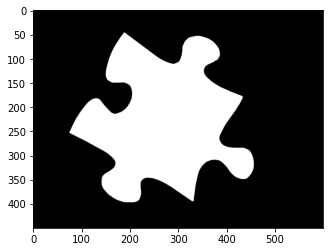

In [15]:
#4.4
mask1 = cv2.imread('mask-35.png',cv2.IMREAD_GRAYSCALE)
plt.imshow(mask1 , cmap= 'gray')
plt.show()

In [16]:
#4.4
num_black_pixels = np.count_nonzero((mask1 == 0))
print(F"The number of black pixels is: {num_black_pixels}")

The number of black pixels is: 194855


In [17]:
#4.5
num_white_pixels = np.count_nonzero((mask1 == 255))
print(F"The number of white pixels is: {num_white_pixels}")

The number of white pixels is: 73196


In [18]:
#4.6
min_pixel_value = np.min(image1_grey) * 255
print(F"The min pixel value in the greyscale image is: {int(min_pixel_value)}")


The min pixel value in the greyscale image is: 21


In [19]:
#4.7
max_pixel_value = np.max(image1_grey) * 255
print(F"The max pixel value in the greyscale image is: {int(max_pixel_value)}")


The max pixel value in the greyscale image is: 229


In [20]:
#4.8
masked_array = np.ma.masked_array(image1_grey,mask1)
min_indices = np.ma.where(masked_array == masked_array.min())
min_puzzle_pixel_value = image1_grey[min_indices[0],min_indices[1]] * 255
print(F"The min pixel value of the puzzle pixels {min_puzzle_pixel_value[0]}")

masked_array = np.ma.masked_array(image1_grey,mask1)
max_indices = np.ma.where(masked_array == masked_array.max())
max_puzzle_pixel_value = image1_grey[max_indices[0],max_indices[1]] * 255
print(F"The max pixel value of the puzzle pixels {max_puzzle_pixel_value[0]}")

The min pixel value of the puzzle pixels 37.6299
The max pixel value of the puzzle pixels 194.3261


In [21]:
#4.9
mask1_inverted = ~mask1

masked_array = np.ma.masked_array(image1_grey,mask1_inverted)
min_indices = np.ma.where(masked_array == masked_array.min())
min_puzzle_pixel_value = image1_grey[min_indices[0],min_indices[1]] * 255
print(F"The min pixel value of the background pixels {int(min_puzzle_pixel_value[0])}")

masked_array = np.ma.masked_array(image1_grey,mask1_inverted)
max_indices = np.ma.where(masked_array == masked_array.max())
max_puzzle_pixel_value = image1_grey[max_indices[0],max_indices[1]] * 255
print(F"The max pixel value of the background pixels {int(max_puzzle_pixel_value[0])}")

The min pixel value of the background pixels 21
The max pixel value of the background pixels 229


In [22]:
#4.10
image1_mean_intensity = np.mean(image1_grey) * 255
print(F"The mean pixel intensity of the image is: {image1_mean_intensity}")


The mean pixel intensity of the image is: 137.3101006240741


In [23]:
#4.11
masked_array = np.ma.masked_array(image1_grey,mask1)
masked_array_mean = masked_array.mean() * 255
print(F"The mean brightness of the puzzle pixels is: {masked_array_mean}")


The mean brightness of the puzzle pixels is: 146.8233539888635


In [24]:
#4.12
masked_array = np.ma.masked_array(image1_grey,mask1_inverted)
masked_array_mean = masked_array.mean() * 255
print(F"The mean brightness of the background pixels is: {masked_array_mean}")


The mean brightness of the background pixels is: 112.93231647357779


In [25]:
#4.13
masked_array = np.ma.masked_array(image1_grey,mask1)
masked_array_var = masked_array.var() * 255
print(F"The variance of the puzzle pixels is: {masked_array_var}")


The variance of the puzzle pixels is: 1.9755208039139605


In [26]:
#4.14
masked_array = np.ma.masked_array(image1_grey,mask1_inverted)
masked_array_var = masked_array.var() * 255
print(F"The variance of the background pixels is: {masked_array_var}")


The variance of the background pixels is: 9.762933212589335


In [27]:
def plot_intensities(img,clrs = ['Red','Green','Blue']):
	nums = [0,1,2]
	
	for (i,clr) in zip(nums,clrs):
		image_pixels = img[:,:,i]
		_ = sns.histplot(image_pixels.flatten()).set(title = F'{clr} Pixels')
		plt.show()

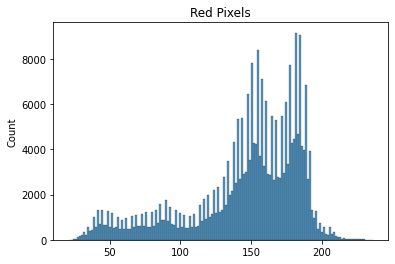

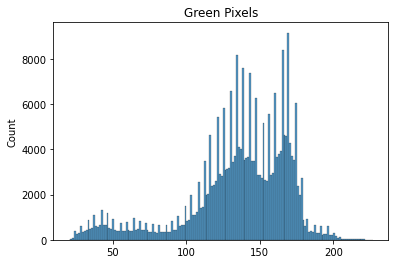

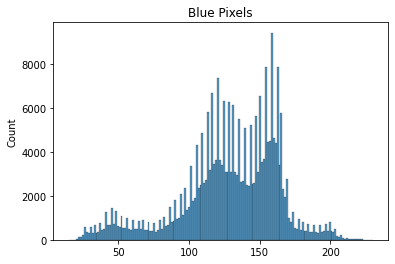

In [28]:
#4.15,4.16,4.17
plot_intensities(image1)

Plot 0 vs 1 vs other

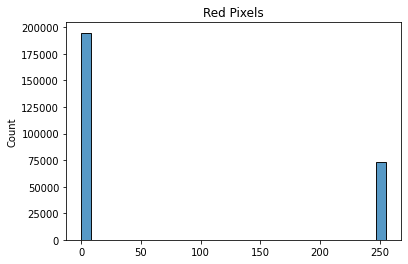

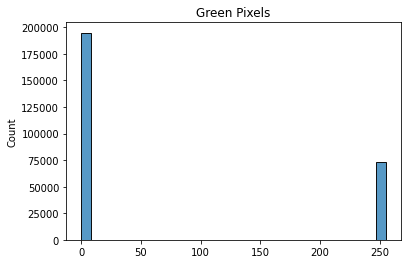

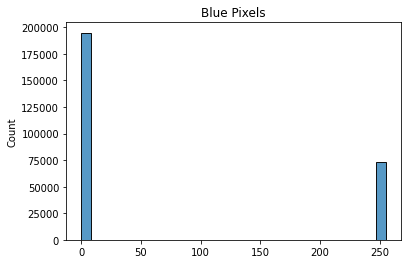

In [29]:
#4.18
mask1_RGB = cv2.imread('mask-35.png')
plot_intensities(mask1_RGB)

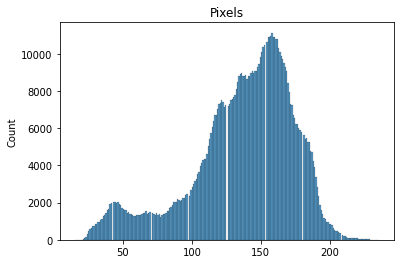

In [30]:
#4.19
values  = np.unique(image1, return_counts=True)[0]
_ = sns.histplot(image1.flatten()).set(title = F'Pixels')
plt.show()

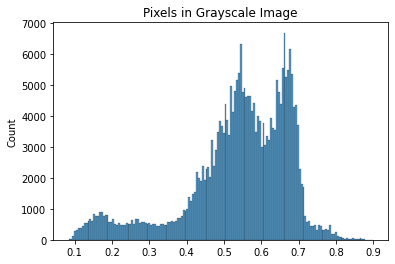

In [31]:
#4.20
_ = sns.histplot(image1_grey.flatten()).set(title = F'Pixels in Grayscale Image')
plt.show()

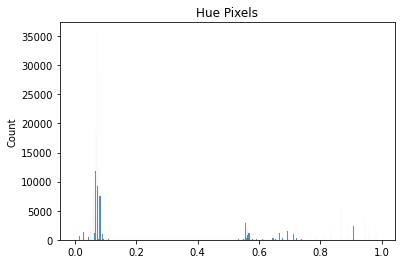

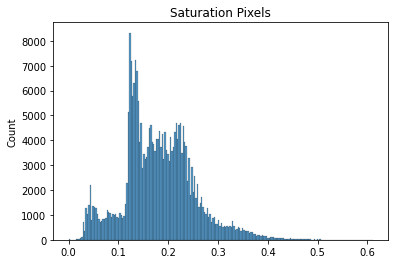

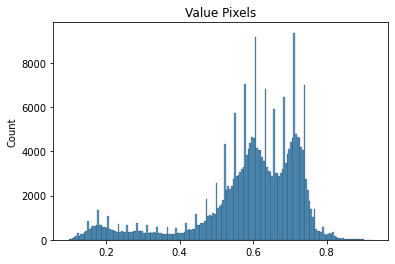

In [32]:
#4.21
plot_intensities(image1_HSV, clrs = ['Hue','Saturation','Value'])

In [33]:
#4.22
def plot_intensities_KDE(img,clrs = ['Red','Green','Blue']):
	nums = [0,1,2]
	
	for (i,clr) in zip(nums,clrs):
		image_pixels = img[:,:,i]
		_ = sns.histplot(image_pixels.flatten(), kde=True).set(title = F'{clr} Pixels')
		plt.show()

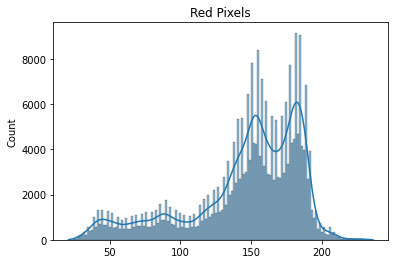

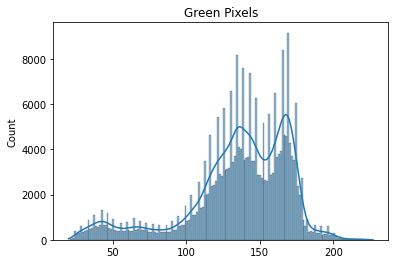

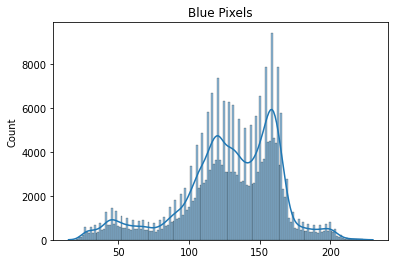

In [34]:
#4.22
plot_intensities_KDE(image1)


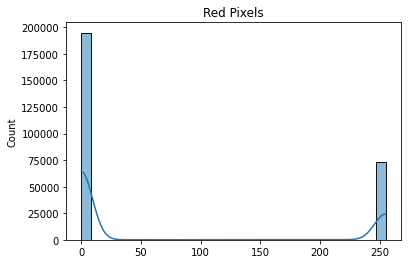

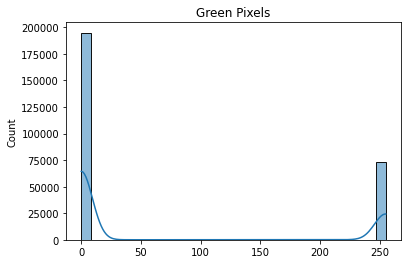

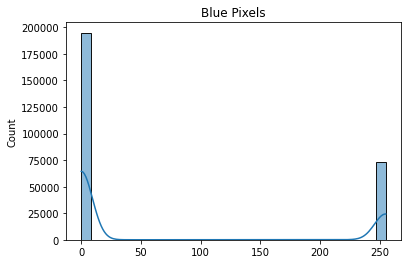

In [35]:
#4.22
plot_intensities_KDE(mask1_RGB)


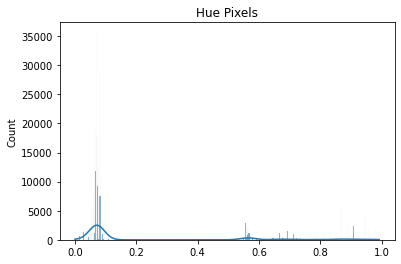

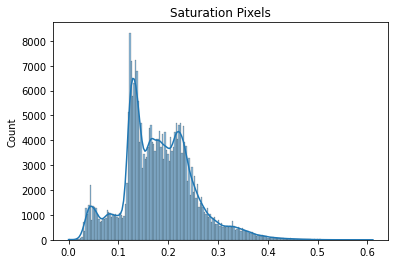

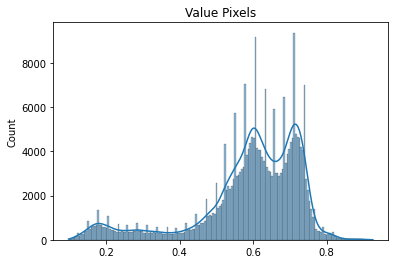

In [36]:
plot_intensities_KDE(image1_HSV, clrs = ['Hue','Saturation','Value'])

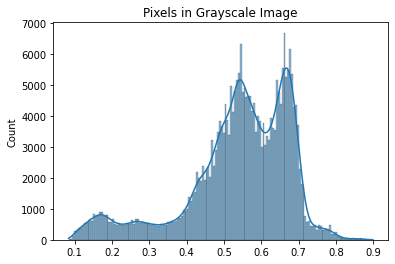

In [37]:
_ = sns.histplot(image1_grey.flatten(), kde=True).set(title = F'Pixels in Grayscale Image')
plt.show()

Question 5

In [38]:
def stretch(img):
    # Contrast stretching the colour image
    p2, p98 = np.percentile(img, (2, 98))
    img_rescale = exposure.rescale_intensity(img, in_range=(p2, p98))
    return img_rescale

def equalize(img):
    # Histogram equalization
    return exposure.equalize_hist(img)

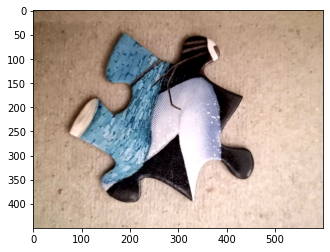

In [39]:
#5.1
plt.imshow(stretch(image1))
plt.show()

C:\Users\joshu\AppData\Roaming\Python\Python39\site-packages\skimage\_shared\utils.py:394: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel, or set channel_axis.
  return func(*args, **kwargs)


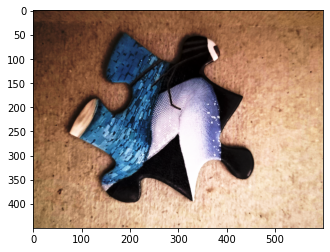

In [40]:
#5.2

plt.imshow(equalize(image1))
plt.show()

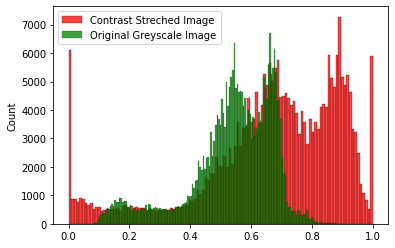

In [41]:
grey_strected = stretch(image1_grey)

_ = sns.histplot(grey_strected.flatten(), color='red')
_ = sns.histplot(image1_grey.flatten(), color='green')
plt.legend(['Contrast Streched Image', 'Original Greyscale Image'])
plt.show()

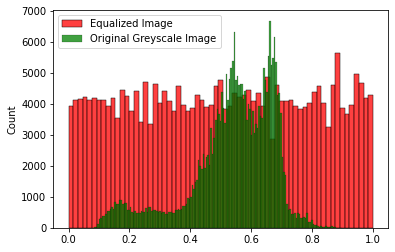

In [42]:
grey_eq= equalize(image1_grey)

_ = sns.histplot(grey_eq.flatten(), color='red')
_ = sns.histplot(image1_grey.flatten(), color='green')
plt.legend(['Equalized Image', 'Original Greyscale Image'])
plt.show()

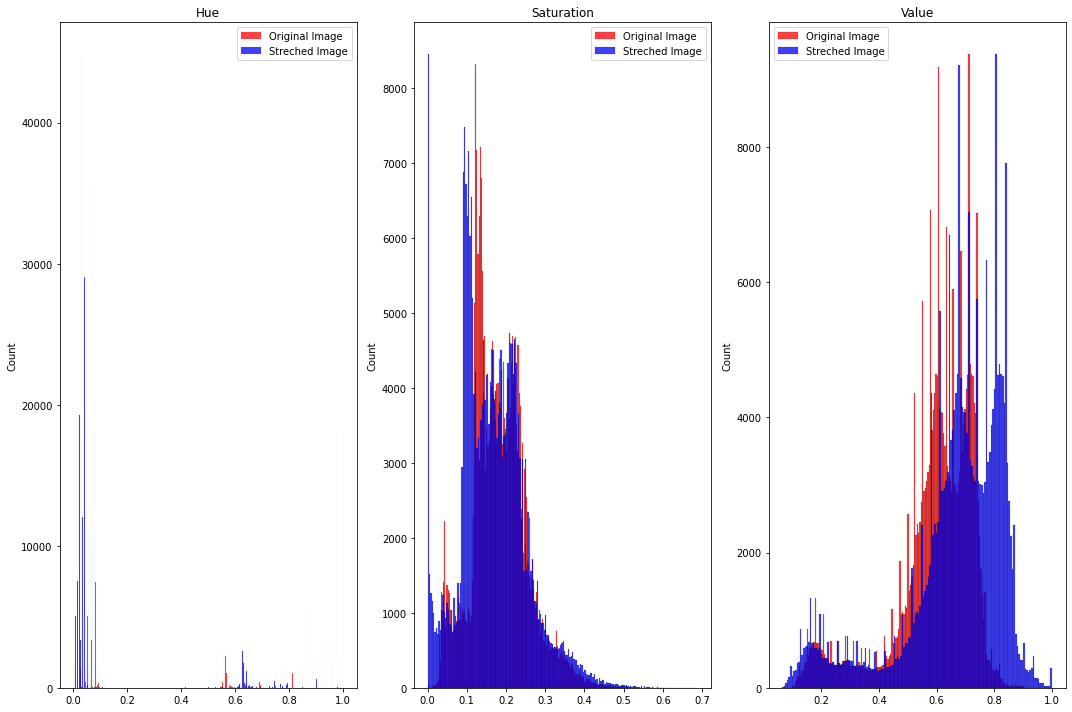

In [43]:
hsv_rescale = stretch(skimage.color.rgb2hsv(image1))

fig, axs = plt.subplots(ncols=3, figsize=(15, 10))

sns.histplot(image1_HSV[:, :, 0].flatten(), color='red', ax=axs[0])
sns.histplot(hsv_rescale[:, :, 0].flatten(), color='blue', ax=axs[0])

sns.histplot(image1_HSV[:, :, 1].flatten(), color='red', ax=axs[1])
sns.histplot(hsv_rescale[:, :, 1].flatten(), color='blue', ax=axs[1])

sns.histplot(image1_HSV[:, :, 2].flatten(), color='red', ax=axs[2])
sns.histplot(hsv_rescale[:, :, 2].flatten(), color='blue', ax=axs[2])


axs[0].legend(['Original Image', 'Streched Image'])
axs[0].set_title('Hue')

axs[1].legend(['Original Image', 'Streched Image'])
axs[1].set_title('Saturation')

axs[2].legend(['Original Image', 'Streched Image'])
axs[2].set_title('Value')


fig.tight_layout()
plt.show()

C:\Users\joshu\AppData\Roaming\Python\Python39\site-packages\skimage\_shared\utils.py:394: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel, or set channel_axis.
  return func(*args, **kwargs)


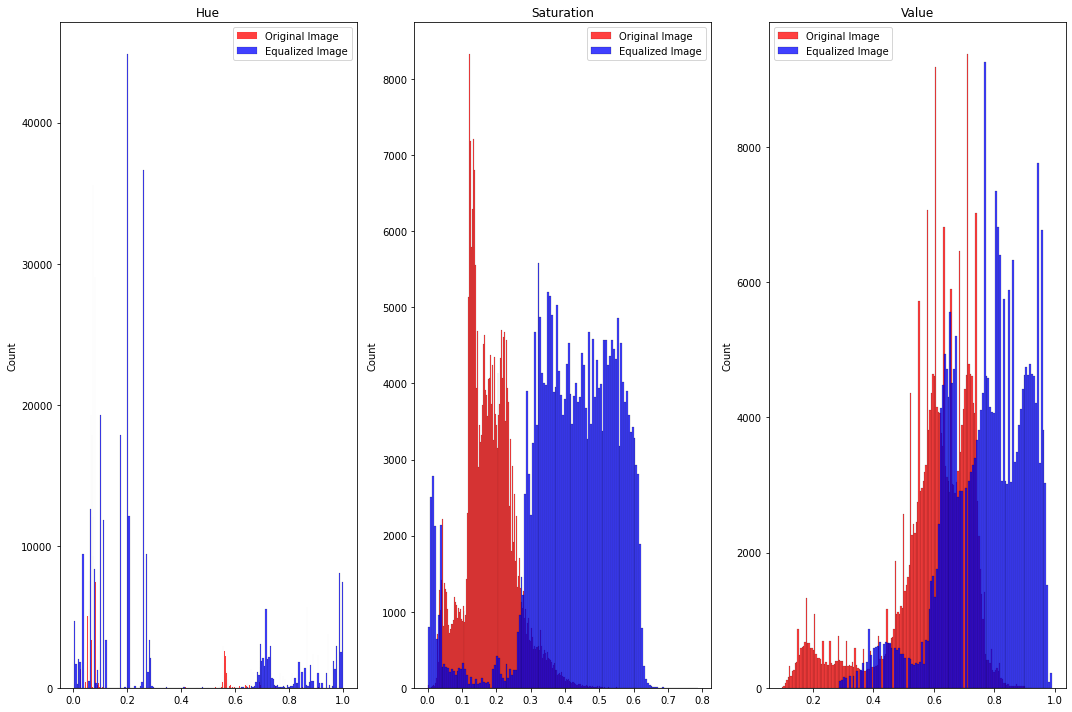

In [44]:
hsv_eq = equalize(skimage.color.rgb2hsv(image1))

fig, axs = plt.subplots(ncols=3, figsize=(15, 10))

sns.histplot(image1_HSV[:, :, 0].flatten(), color='red', ax=axs[0])
sns.histplot(hsv_eq[:, :, 0].flatten(), color='blue', ax=axs[0])

sns.histplot(image1_HSV[:, :, 1].flatten(), color='red', ax=axs[1])
sns.histplot(hsv_eq[:, :, 1].flatten(), color='blue', ax=axs[1])

sns.histplot(image1_HSV[:, :, 2].flatten(), color='red', ax=axs[2])
sns.histplot(hsv_eq[:, :, 2].flatten(), color='blue', ax=axs[2])


axs[0].legend(['Original Image', 'Equalized Image'])
axs[0].set_title('Hue')

axs[1].legend(['Original Image', 'Equalized Image'])
axs[1].set_title('Saturation')

axs[2].legend(['Original Image', 'Equalized Image'])
axs[2].set_title('Value')


fig.tight_layout()
plt.show()

In [45]:
mean_1 = np.mean(image1)
mean_1_rescale = np.mean(stretch(image1))
mean_1_eq = np.mean(equalize(image1))

print(f'Initial Mean: {mean_1}')
print(f'Contrast Streched Mean: {mean_1_rescale}')
print(f'Equalized Mean: {mean_1_eq}')

Initial Mean: 136.83142098765433
Contrast Streched Mean: 161.03715925925925
Equalized Mean: 0.5043168942767873


C:\Users\joshu\AppData\Roaming\Python\Python39\site-packages\skimage\_shared\utils.py:394: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel, or set channel_axis.
  return func(*args, **kwargs)


In [46]:
var_1 = np.var(image1)
var_1_rescale = np.var(stretch(image1))
var_1_eq = np.var(equalize(image1))

print(f'Initial Variance: {var_1}')
print(f'Contrast Streched Variance: {var_1_rescale}')
print(f'Equalized Variance: {var_1_eq}')

Initial Variance: 1404.3826391412877
Contrast Streched Variance: 3772.975089559822
Equalized Variance: 0.0838358636296976


In [47]:
mean_1 = np.mean(image1_HSV)
mean_1_rescale = np.mean(stretch(image1_HSV))
mean_1_eq = np.mean(equalize(image1_HSV))

print(f'Initial Mean: {mean_1}')
print(f'Contrast Streched Mean: {mean_1_rescale}')
print(f'Equalized Mean: {mean_1_eq}')

Initial Mean: 0.33087123306945426
Contrast Streched Mean: 0.3460741407183911
Equalized Mean: 0.5079362020338396


In [48]:
var_1 = np.var(image1_HSV)
var_1_rescale = np.var(stretch(image1_HSV))
var_1_eq = np.var(equalize(image1_HSV))

print(f'Initial Variance: {var_1}')
print(f'Contrast Streched Variance: {var_1_rescale}')
print(f'Equalized Variance: {var_1_eq}')

Initial Variance: 0.06893335782204116
Contrast Streched Variance: 0.10033922458397534
Equalized Variance: 0.07978386351456634


In [49]:
mean_1 = np.mean(image1_grey)
mean_1_rescale = np.mean(stretch(image1_grey))
mean_1_eq = np.mean(equalize(image1_grey))

print(f'Initial Mean: {mean_1}')
print(f'Contrast Streched Mean: {mean_1_rescale}')
print(f'Equalized Mean: {mean_1_eq}')

Initial Mean: 0.5384709828395062
Contrast Streched Mean: 0.6639213268734958
Equalized Mean: 0.5041678685845373


In [50]:
var_1 = np.var(image1_grey)
var_1_rescale = np.var(stretch(image1_grey))
var_1_eq = np.var(equalize(image1_grey))

print(f'Initial Variance: {var_1}')
print(f'Contrast Streched Variance: {var_1_rescale}')
print(f'Equalized Variance: {var_1_eq}')

Initial Variance: 0.01974745203808972
Contrast Streched Variance: 0.056398042494774966
Equalized Variance: 0.08395455021362053


Question 6

In [51]:
# Converting images to floating point

image1 = image1.astype(np.float32)/255
image2 = image2.astype(np.float32)/255
image3 = image3.astype(np.float32)/255


In [52]:
# 6.1

def convolution(img, K):
    # Rotate Kernel
    K = np.rot90(np.rot90(K))
    # Padding with 0s
    pad_size = K.shape[0]//2
    img_padded = np.pad(img, pad_size)
    new_img = np.zeros(img_padded.shape)

    for row in range(1, img_padded.shape[0] - 1):
        for col in range(1, img_padded.shape[1] - 1):
            new_img[row, col] = np.sum(np.multiply(img_padded[row-pad_size:row+pad_size+1, col-pad_size:col+pad_size+1], K))
    # Removing padding
    return new_img[pad_size:-1*pad_size, pad_size:-1*pad_size]

In [53]:
# 6.2

def convolve(img, kernel):
    img_conv = np.zeros(img.shape)
    for i in range(3):
        img_conv[:, :, i] = convolution(img[:, :, i], kernel) # applying the convolution to each channel seperately
    return img_conv

v_prewitt = np.array([
    [1, 0, -1],
    [1, 0, -1],
    [1, 0, -1]
])
h_prewitt = np.array([
    [1, 1, 1],
    [0, 0, 0],
    [-1, -1, -1]
])
laplacian = np.array([
    [0, -1, 0],
    [-1, 4, -1],
    [0, -1, 0]
])

#6.2
img_v_prewitt = convolve(image1, v_prewitt)
img_h_prewitt = convolve(image1, h_prewitt)
img_laplacian = convolve(image1, laplacian)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


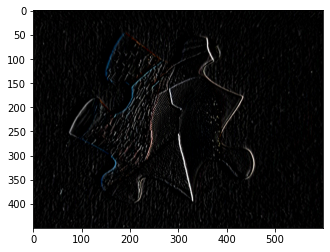

In [54]:
#6.2
plt.imshow(img_v_prewitt)
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


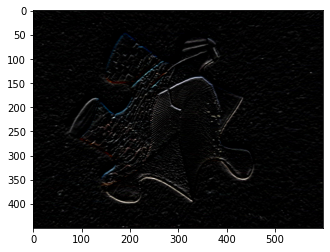

In [55]:
#6.2
plt.imshow(img_h_prewitt)
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


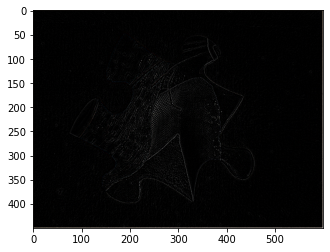

In [56]:
#6.2
plt.imshow(img_laplacian)
plt.show()

In [57]:
#6.3
def get_features(image, hpre, vpre, lapl):
    features = np.zeros((image.shape[0] * image.shape[1], 15))
    features[:, 0] = vpre[:, :, 0].flatten()
    features[:, 1] = vpre[:, :, 1].flatten()
    features[:, 2] = vpre[:, :, 2].flatten()
    features[:, 3] = hpre[:, :, 0].flatten()
    features[:, 4] = hpre[:, :, 1].flatten()
    features[:, 5] = hpre[:, :, 2].flatten()
    features[:, 6] = lapl[:, :, 0].flatten()
    features[:, 7] = lapl[:, :, 1].flatten()
    features[:, 8] = lapl[:, :, 2].flatten()
    features[:, 9] = image[:, :, 0].flatten()
    features[:, 10] = image[:, :, 1].flatten()
    features[:, 11] = image[:, :, 2].flatten()

    im_hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
    features[:, 12] = im_hsv[:, :, 0].flatten()
    features[:, 13] = im_hsv[:, :, 1].flatten()
    features[:, 14] = im_hsv[:, :, 2].flatten()

    return features

feat_image1 = get_features(image1, img_h_prewitt, img_v_prewitt, img_laplacian)

In [58]:
# 6.3

mean_im = feat_image1.mean(axis=0)
cov_im = np.cov(feat_image1.T)

In [59]:
mvn = multivariate_normal(mean = mean_im, cov = cov_im)

In [60]:
f2 = get_features(image2, convolve(image2, h_prewitt), convolve(image2, v_prewitt), convolve(image2, laplacian))

In [61]:
pdf = mvn.pdf(f2)
pdf = pdf.reshape(image2.shape[:2])

In [62]:
def get_mask(pdf, thresh):
    t = pdf < thresh
    t = t.astype(int)
    return t

def get_acc(our_mask, true_mask):
    a = 0
    for o, t in zip(our_mask.flatten(), true_mask.flatten()):
        a += np.abs(o - t)

    a /= our_mask.shape[0] * our_mask.shape[1]
    return 1-a

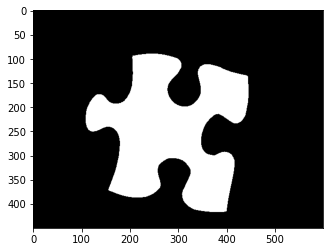

In [63]:
mask2 = cv2.imread('mask-83.png', cv2.IMREAD_GRAYSCALE)

thresh = threshold_mean(mask2)

mask2_bin = (mask2 > thresh).astype(int)

plt.imshow(mask2_bin, cmap='gray')

The best performance was achieved at max(pdf)*1/11000, with an accuracy of 0.9100333333333334


<AxesSubplot:>

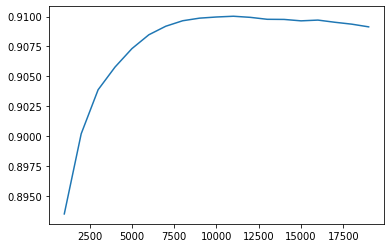

In [64]:
acc = []
for i in np.arange(1000, 20000, 1000):
    acc.append(get_acc(get_mask(pdf, np.max(pdf) * 1/i), mask2_bin))


print(f'The best performance was achieved at max(pdf)*1/{np.arange(1000, 20000, 1000)[np.argmax(acc)]}, with an accuracy of {np.max(acc)}')
sns.lineplot(y = acc, x = np.arange(1000, 20000, 1000))

91.00333333333333% accuracy


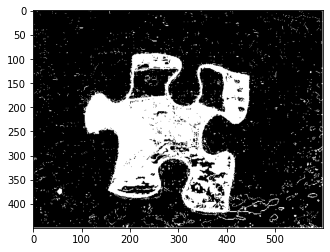

In [65]:
theta = np.max(pdf)*1/11000

a = get_acc(get_mask(pdf, theta), mask2_bin)

print(f'{a * 100}% accuracy')
plt.imshow(get_mask(pdf, theta), cmap='gray')
plt.show()

22.488518518518518% accuracy


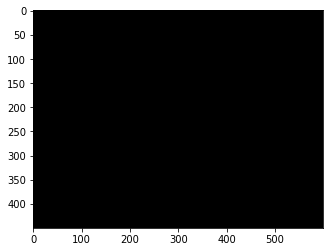

In [66]:
image1_HSV = skimage.color.rgb2hsv(image1)

hsv_v_prewitt = convolve(image1_HSV, v_prewitt)
hsv_h_prewitt = convolve(image1_HSV, h_prewitt)
hsv_laplacian = convolve(image1_HSV, laplacian)

feat_image1_hsv = get_features(image1, hsv_h_prewitt, hsv_v_prewitt, hsv_laplacian)

mean_im_hsv = feat_image1_hsv.mean(axis=0)
cov_im_hsv = np.cov(feat_image1_hsv.T)

mvn2 = multivariate_normal(mean = mean_im_hsv, cov = cov_im_hsv)

image2_HSV = skimage.color.rgb2hsv(image2)

hsv_v_prewitt2 = convolve(image2_HSV, v_prewitt)
hsv_h_prewitt2 = convolve(image2_HSV, h_prewitt)
hsv_laplacian2 = convolve(image2_HSV, laplacian)

feat_image2_hsv = get_features(image2, hsv_h_prewitt2, hsv_v_prewitt2, hsv_laplacian2)

pdf_hsv = mvn2.pdf(feat_image2_hsv)
pdf_hsv = pdf_hsv.reshape(image2_HSV.shape[:2])

a = get_acc(get_mask(pdf_hsv, theta), mask2_bin)

print(f'{a * 100}% accuracy')
plt.imshow(get_mask(pdf_hsv, theta), cmap='gray')
plt.show()

Using the same threshold as before, accuracy was significatnly reduced. By using a new threshold, a higher final accuracy can be achieved as shown below.

The best performance was achieved at max(pdf)*1/750, with an accuracy of 0.9432481481481482


<AxesSubplot:>

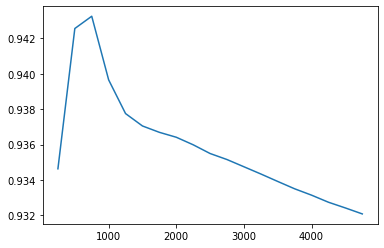

In [67]:
xv = np.arange(250, 5000, 250)

acc = []
for i in xv:
    acc.append(get_acc(get_mask(pdf_hsv, np.max(pdf_hsv) * 1/i), mask2_bin))


print(f'The best performance was achieved at max(pdf)*1/{xv[np.argmax(acc)]}, with an accuracy of {np.max(acc)}')
sns.lineplot(y = acc, x = xv)

94.32481481481481% accuracy


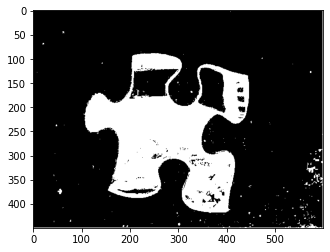

In [68]:
theta = np.max(pdf_hsv)*1/750

a = get_acc(get_mask(pdf_hsv, theta), mask2_bin)

print(f'{a * 100}% accuracy')
plt.imshow(get_mask(pdf_hsv, theta), cmap='gray')
plt.show()

95.54703703703704% accuracy


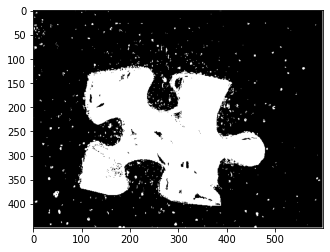

In [69]:
# HSV Model gave best accuracy

v_prewitt3 = convolve(image3, v_prewitt)
h_prewitt3 = convolve(image3, h_prewitt)
laplacian3 = convolve(image3, laplacian)

feat_image3 = get_features(image3, h_prewitt3, v_prewitt3, laplacian3)


pdf3 = mvn2.pdf(feat_image3)
pdf3= pdf3.reshape(image3.shape[:2])

mask3 = cv2.imread('mask-110.png', cv2.IMREAD_GRAYSCALE)

thresh = threshold_mean(mask3)

mask3_bin = (mask3 > thresh).astype(int)

a = get_acc(get_mask(pdf3, theta), mask3_bin)

print(f'{a * 100}% accuracy')
plt.imshow(get_mask(pdf3, theta), cmap='gray')
plt.show()

Question 7

In [70]:
pdf_model1 = mvn.pdf(feat_image3).reshape(image3.shape[:2])
pdf_model2 = mvn2.pdf(feat_image3).reshape(image3.shape[:2])

y_pred1 = get_mask(pdf_model1, np.max(pdf_model1)*1/11000)
y_pred2 = get_mask(pdf_model2, np.max(pdf_model2)*1/750)

conf_model1 = confusion_matrix(mask3_bin.flatten(), y_pred1.flatten())
conf_model2 = confusion_matrix(mask3_bin.flatten(), y_pred2.flatten())

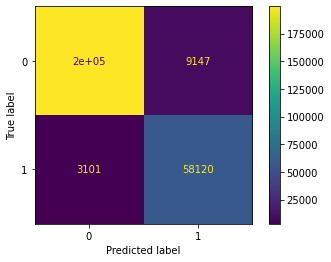

In [71]:
ConfusionMatrixDisplay(conf_model1).plot()
plt.show()

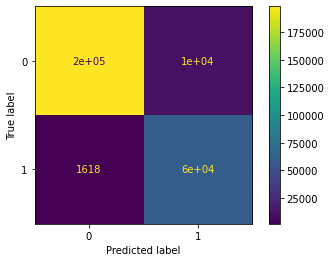

In [72]:
ConfusionMatrixDisplay(conf_model2).plot()
plt.show()

In [73]:
print(f"Cohen's Kappa score for model 1: {sklearn.metrics.cohen_kappa_score(mask3_bin.flatten(), y_pred1.flatten())}")
print(f"Cohen's Kappa score for model 2: {sklearn.metrics.cohen_kappa_score(mask3_bin.flatten(), y_pred2.flatten())}")

Cohen's Kappa score for model 1: 0.874998932101108
Cohen's Kappa score for model 2: 0.8794997595480345


In [74]:
print(f"IoU for model 1: {sklearn.metrics.jaccard_score(mask3_bin.flatten(), y_pred1.flatten())}")
print(f"IoU for model 2: {sklearn.metrics.jaccard_score(mask3_bin.flatten(), y_pred2.flatten())}")

IoU for model 1: 0.825943610732151
IoU for model 2: 0.8325836732413253


7(d) ROC Curve

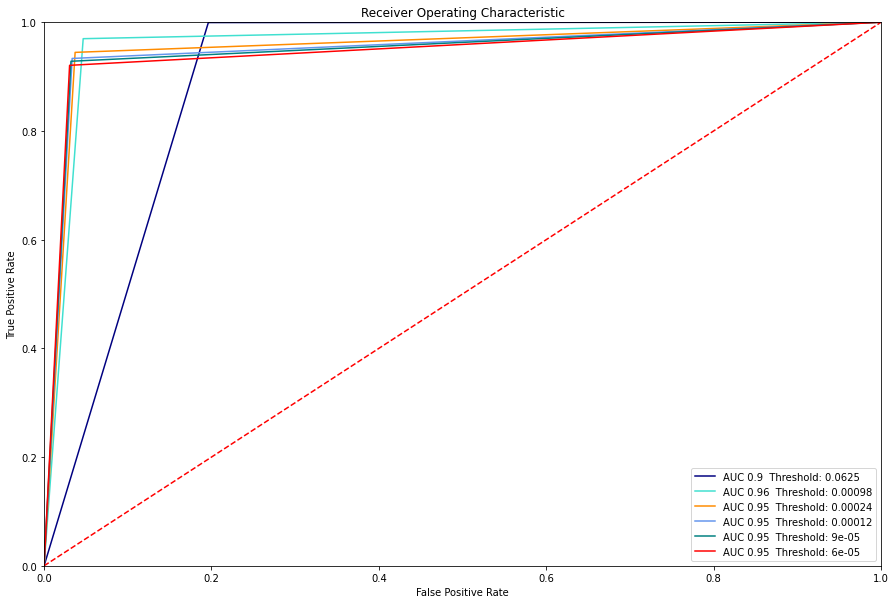

In [120]:
plt.figure(figsize=(15,10))

thresholds = [16,1024,4096,8192,11000,16384]
colors = ["navy", "turquoise", "darkorange", "cornflowerblue", "teal","red"]

for t,clr in zip(thresholds,colors):
	fpr, tpr, threshold  = sklearn.metrics.roc_curve(mask3_bin.flatten(), get_mask(pdf_model2, np.max(pdf_model2) * 1/t).flatten())
	roc_auc = sklearn.metrics.auc(fpr, tpr)
	label = F'AUC {np.round(roc_auc,2)}  Threshold: {np.round(1/t,5)}'
	plt.plot(fpr, tpr, 'b', color  = clr, label = label)

plt.title('Receiver Operating Characteristic')
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


The ROC curve helps us find the threshold where the TPR is high and FPR is low. All these thresholds performed similarly but we would choose the ROC curve furthest to the top left, with the greatest AUC score and this would help us determine the optimal threshold.

7(d) Precision-Recall Curve

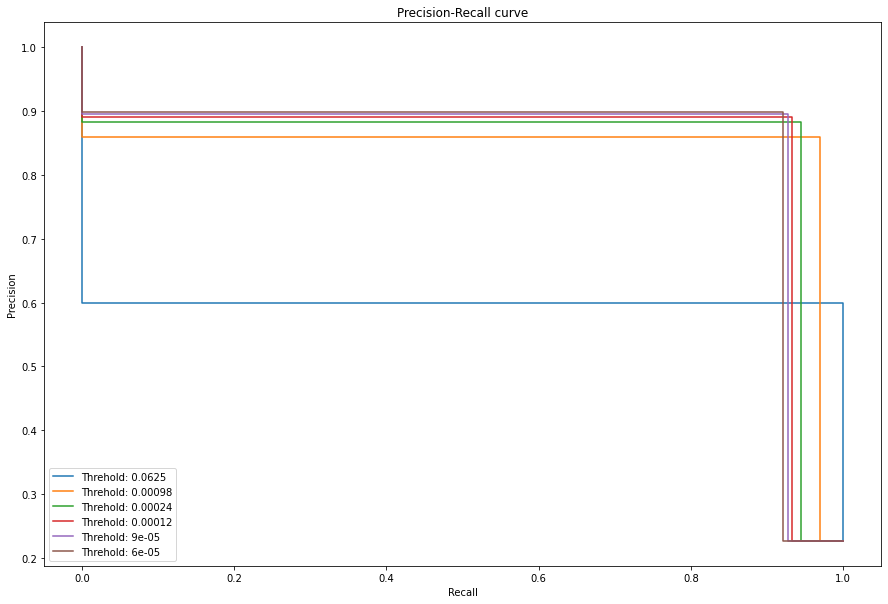

In [137]:
thresholds = [16,1024,4096,8192,11000,16384]
plt.figure(figsize=(15,10))

for t in thresholds:
	# display = sklearn.metrics.PrecisionRecallDisplay.from_predictions(mask3_bin.flatten(), get_mask(pdf_model2, np.max(pdf_model2) * 1/t).flatten(), name="t")
	precision, recall , _ = sklearn.metrics.precision_recall_curve(mask3_bin.flatten(), get_mask(pdf_model2, np.max(pdf_model2) * 1/t).flatten())
	disp = sklearn.metrics.PrecisionRecallDisplay(precision=precision, recall=recall)
	disp.plot(ax = plt.gca(), name = F'Threhold: {np.round(1/t,5)}')

_ = plt.title('Precision-Recall curve')